<a href="https://colab.research.google.com/github/YaeliBarGimelshtein/ML-NN/blob/main/HW1_NEURON_NETWORKS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Work 1: Creating XOR Function




In [ ]:
#IMPORTS
import torch
from torch import nn
import numpy as np





In [ ]:
#CREATING CLASS LAYER
class Layer(nn.Module):
  def __init__(self, in_features: int, out_features: int, bias: bool = True, device=None, dtype=None) -> None:
    factory_kwargs = {'device': device, 'dtype': dtype}
    super(Layer, self).__init__()
    self.in_features = in_features
    self.out_features = out_features
    self.weight = nn.Parameter(torch.empty((in_features, out_features), **factory_kwargs))
    if bias:
        self.bias = nn.Parameter(torch.empty(out_features, **factory_kwargs))
    else:
        self.register_parameter('bias', None)
    self.reset_parameters()

  def reset_parameters(self) -> None:
    self.weight = nn.Parameter(torch.rand([self.in_features, self.out_features]))
    if self.bias is not None:
      self.bias = nn.Parameter(torch.rand([self.out_features]))

  def set_weights(self, w, b):
    self.weight = nn.Parameter(torch.tensor(w))
    self.bias = nn.Parameter(torch.tensor(b))
    
  def forward(self, input: torch.Tensor) -> torch.Tensor:
   return torch.matmul(input, self.weight) + self.bias
   


  def extra_repr(self) -> str:
    return 'in_features={}, out_features={}, bias={}'.format(
        self.in_features, self.out_features, self.bias is not None
      )





יצירת מחלקה שמייצגת שכבה ברשת הניורונים

In [ ]:
#CREATING CLASS SIGMOID AS ACTIVATION FUNCTION
class Sigmoid(nn.Module):
  def __init__(self, T=0.2):
      super(Sigmoid, self).__init__()
      self.T = T

  def forward(self, input: torch.Tensor) -> torch.Tensor:
      return 1 / (1 + torch.exp(-input/self.T))







יצירת מחלקה סיגמואיד שמהווה את פונקצית האקטיבציה של ניורון (אם ירה או לא)

In [ ]:
#CREATING CLASS NETWORK AS NEURON NETWORK
class Network(nn.Module):
  def __init__(self, k, input_nums, bypass=False):
    super().__init__()
    self.input_nums = input_nums
    self.output_num = 1
    self.Temp = 0.001
    self.bypass = bypass
    self.k = k
    self.hidden = Layer(self.input_nums, self.k)
    if self.bypass:
      self.output = Layer(self.k + self.input_nums, self.output_num)
    else:
      self.output = Layer(self.k, self.output_num)
    self.Sigmoid = Sigmoid(self.Temp)
  
  def forward(self, input: torch.Tensor):
    z1 = self.hidden.forward(input)
    y1 = self.Sigmoid.forward(z1)
    if self.bypass:
      y1_concat = torch.cat((input, y1), 1)
      z2 = self.output.forward(y1_concat)
    else:
      z2 = self.output.forward(y1)
    return self.Sigmoid.forward(z2)
  
  def set_weights(self, w: torch.Tensor, b: torch.Tensor, layer_name):
    if layer_name == "hidden":
      if w.size() != (self.input_nums, self.k):
        print("wrong size of weights")
        return

      if b.size() != (1, self.k):
        print("wrong size of bias")
        return
      
      self.hidden.set_weights(w,b)

    
    if layer_name == "output":
      if self.bypass:
        if w.size() != (self.k + self.input_nums, self.output_num):
          print("wrong size of weights")
          return
      else:
        if w.size() != (self.k, self.output_num):
          print("wrong size of weights")
          return
      
      if b.size() != (1, 1):
        print("wrong size of bias")
        return

      self.output.set_weights(w,b)


מחלקה שמהווה רשת פשוטה של ניורונים : שכבת קלט שכבה אחת נסתרת ושכבת פלט

In [ ]:
#CREATING LOSS FUNCTION (SSE)
def Loss(x, t, model: Network, print_deltas=False):
  squared_deltas = torch.square(model.forward(x) - t) 
  if print_deltas:
    print(squared_deltas)
  return torch.sum(squared_deltas)

פונקציה שבודקת את היעילות של הרשת הזו

main program

k=4

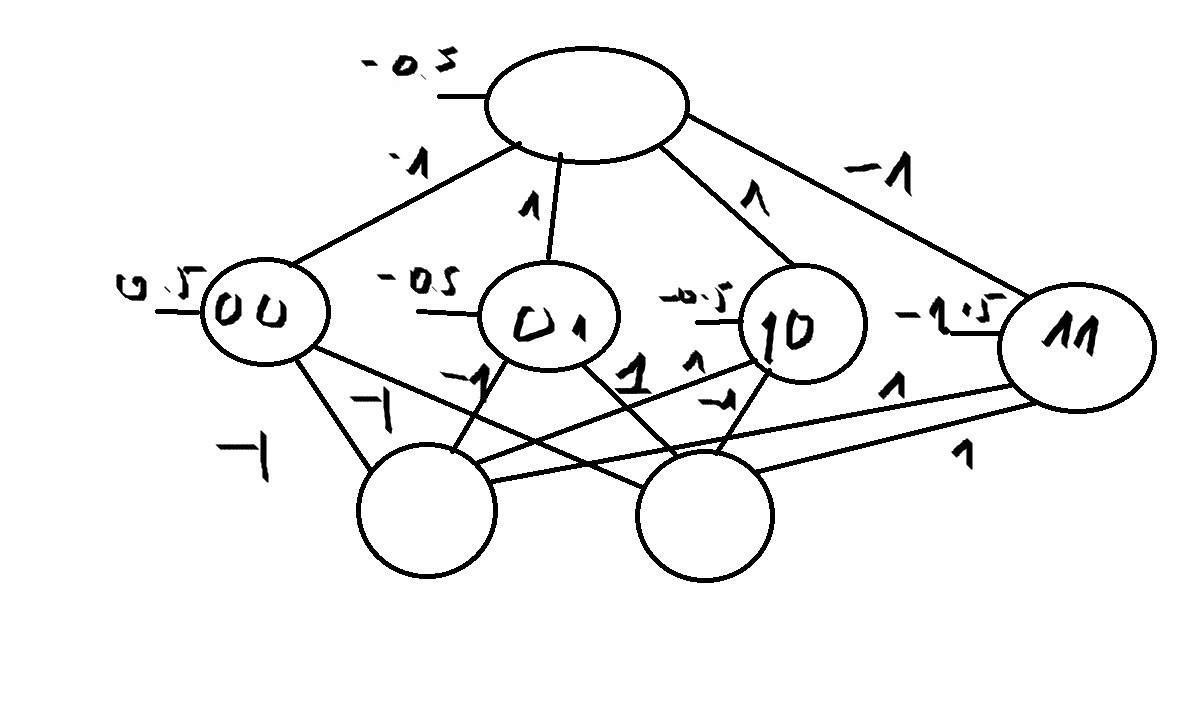

In [ ]:
n = 2
k = 4

model = Network(k , n)

#WEIGHTS
hidden_w = torch.tensor([[-1, -1, 1, 1], [-1, 1, -1, 1]], dtype=torch.float32)
out_w = torch.tensor([[-1], [1], [1], [-1]], dtype=torch.float32)

#BIAS
hidden_b = torch.tensor([[0.5,-0.5,-0.5,-1.5]], dtype=torch.float32)
out_b =torch.tensor([[-0.5]], dtype=torch.float32)

#DATA
xor_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
xor_target = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

#SETTING WEIGHTS + BIAS PER LEVEL
model.set_weights(hidden_w, hidden_b, "hidden")
model.set_weights(out_w, out_b, "output")


#PRINT
print("-----------------------------------A---------------------------")
print("the weights for hidden layer are " , hidden_w)
print("the bias for hidden layer are " , hidden_b)

print("the weights for output layer are " , out_w)
print("the bias for output layer are " , out_b)

print("-----------------------------------B---------------------------")
print("the loss for this model is " , Loss(xor_train, xor_target, model))

print("-----------------------------------C---------------------------")
print("here is the truth table:\n", xor_train, "->", model.forward(xor_train))

-----------------------------------A---------------------------
the weights for hidden layer are  tensor([[-1., -1.,  1.,  1.],
        [-1.,  1., -1.,  1.]])
the bias for hidden layer are  tensor([[ 0.5000, -0.5000, -0.5000, -1.5000]])
the weights for output layer are  tensor([[-1.],
        [ 1.],
        [ 1.],
        [-1.]])
the bias for output layer are  tensor([[-0.5000]])
-----------------------------------B---------------------------
the loss for this model is  tensor(0., grad_fn=<SumBackward0>)
-----------------------------------C---------------------------
here is the truth table:
 tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]]) -> tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<MulBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


אחרי שחישבתי על דף נייר (מצורף בציור) ניתן לראות בשביל לממש את הפונקציה אפשר להשתמש ב4 ניורונים נסתרים שרגישים לכל שורה בטבלת האמת

k=2

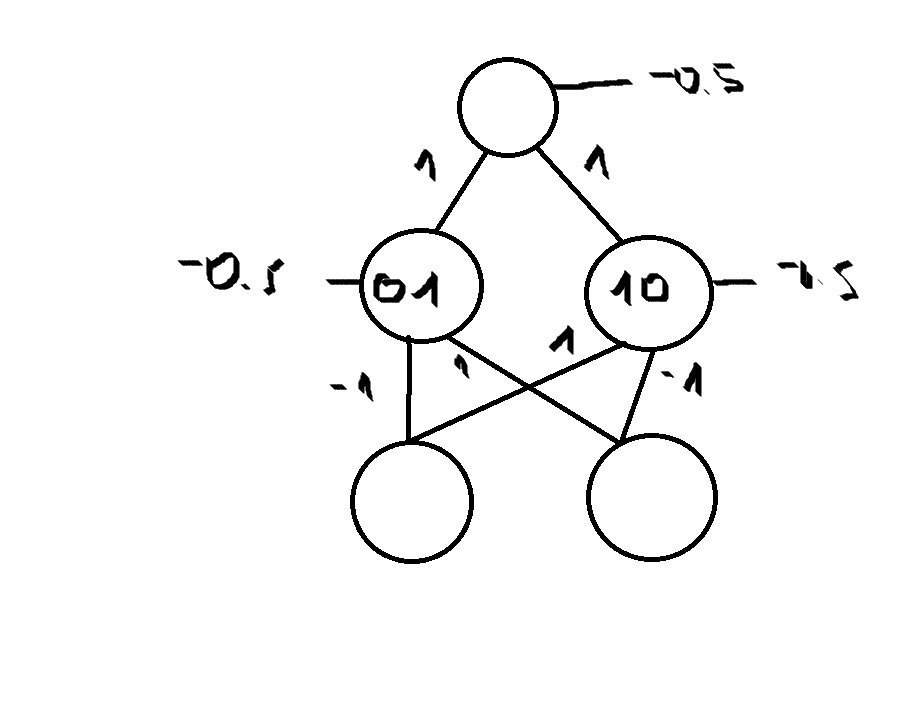

In [ ]:
n = 2
k = 2

model = Network(k , n)

#WEIGHTS
hidden_w = torch.tensor([[-1, 1], [1, -1]], dtype=torch.float32)
out_w = torch.tensor([[1], [1]], dtype=torch.float32)

#BIAS
hidden_b = torch.tensor([ [-0.5, -0.5]], dtype=torch.float32)
out_b =torch.tensor([[-0.5]])

#DATA
xor_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
xor_target = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

#SETTING WEIGHTS + BIAS PER LEVEL
model.set_weights(hidden_w, hidden_b, "hidden")
model.set_weights(out_w, out_b, "output")


#PRINT
print("-----------------------------------A---------------------------")
print("the weights for hidden layer are " , hidden_w)
print("the bias for hidden layer are " , hidden_b)

print("the weights for output layer are " , out_w)
print("the bias for output layer are " , out_b)

print("-----------------------------------B---------------------------")
print("the loss for this model is " , Loss(xor_train, xor_target, model))

print("-----------------------------------C---------------------------")
print("here is the truth table:\n", xor_train, "->", model.forward(xor_train))

-----------------------------------A---------------------------
the weights for hidden layer are  tensor([[-1.,  1.],
        [ 1., -1.]])
the bias for hidden layer are  tensor([[-0.5000, -0.5000]])
the weights for output layer are  tensor([[1.],
        [1.]])
the bias for output layer are  tensor([[-0.5000]])
-----------------------------------B---------------------------
the loss for this model is  tensor(0., grad_fn=<SumBackward0>)
-----------------------------------C---------------------------
here is the truth table:
 tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]]) -> tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<MulBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


אחרי שחישבתי על דף נייר (מצורף בציור) ניתן לראות בשביל לממש את הפונקציה אפשר להשתמש גם רק ב2 ניורונים נסתרים שרגישים לכל שורה "משמעותית" בטבלת האמת

K=1

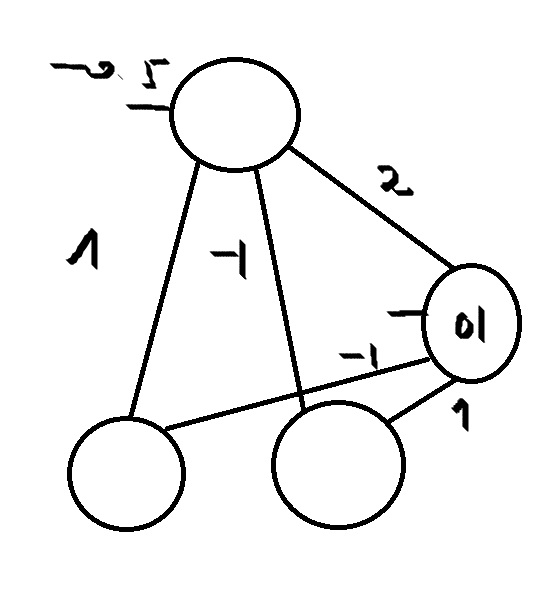

In [ ]:
n = 2
k = 1

model = Network(k , n, bypass=True)

#WEIGHTS
hidden_w = torch.tensor([[-1], [1]], dtype=torch.float32)
out_w = torch.tensor([[1], [-1], [2]], dtype=torch.float32)

#BIAS
hidden_b = torch.tensor([[-0.5]])
out_b =torch.tensor([[-0.5]])

#DATA
xor_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
xor_target = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

#SETTING WEIGHTS + BIAS PER LEVEL
model.set_weights(hidden_w, hidden_b, "hidden")
model.set_weights(out_w, out_b, "output")

#print("the model prints\n", model.forward(xor_train))

#PRINT
print("-----------------------------------A---------------------------")
print("the weights for hidden layer are " , hidden_w)
print("the bias for hidden layer are " , hidden_b)

print("the weights for output layer are " , out_w)
print("the bias for output layer are " , out_b)

print("-----------------------------------B---------------------------")
print("the loss for this model is " , Loss(xor_train, xor_target, model))

print("-----------------------------------C---------------------------")
print("here is the truth table:\n", xor_train, "->", model.forward(xor_train))

-----------------------------------A---------------------------
the weights for hidden layer are  tensor([[-1.],
        [ 1.]])
the bias for hidden layer are  tensor([[-0.5000]])
the weights for output layer are  tensor([[ 1.],
        [-1.],
        [ 2.]])
the bias for output layer are  tensor([[-0.5000]])
-----------------------------------B---------------------------
the loss for this model is  tensor(0., grad_fn=<SumBackward0>)
-----------------------------------C---------------------------
here is the truth table:
 tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]]) -> tensor([[0.],
        [1.],
        [1.],
        [0.]], grad_fn=<MulBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


אחרי שחישבתי על דף נייר (מצורף בציור) ניתן לראות בשביל לממש את הפונקציה אפשר להשתמש אפילו בניורון נסתר אחד ובשילוב עם מעקף שרגישים לכל שורה "משמעותית" בטבלת האמת